# Part C Decision Trees

## C1. Dataset and Setup

In [1]:
## Dataset: Breast Cancer Wisconsin (Diagnostic)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load the dataset
data = load_breast_cancer()

# Dataset details
print(data.DESCR)  # Print dataset description


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:

# Create dataframe for easier data manipulation and visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target # 0 for malignant, 1 for benign

print(df.shape)  # Print the shape of the dataset


(569, 31)


In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df['target'].value_counts()


,count
target,
1,357
0,212


In [7]:
# Separate features and target variable

X = df.drop(['target'], axis=1)
y = df['target']

In [8]:
# X and y details
print(f"Feature matrix shape: {X.shape}")  # Print shape of feature matrix
print(f"Feature names: {list(X.columns)}")  # Print feature names
print(f"Target names: {list(y.unique())}")  # Print label names

Feature matrix shape: (569, 30)
Feature names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Target names: [np.int64(0), np.int64(1)]


In [9]:
# Split the data into 70% training, 15% validation, and 15% test (stratified)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
# stratify parameter ensures that the class distribution is preserved in the splits - important for imbalanced datasets

# Verify the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 398 samples
Validation set size: 85 samples
Test set size: 86 samples


In [10]:
# print class distribution in each set
print("Class distribution in training set:")
print(y_train.value_counts())
print("Class distribution in validation set:")
print(y_val.value_counts())
print("Class distribution in test set:")
print(y_test.value_counts())

Class distribution in training set:
target
1    250
0    148
Name: count, dtype: int64
Class distribution in validation set:
target
1    53
0    32
Name: count, dtype: int64
Class distribution in test set:
target
1    54
0    32
Name: count, dtype: int64


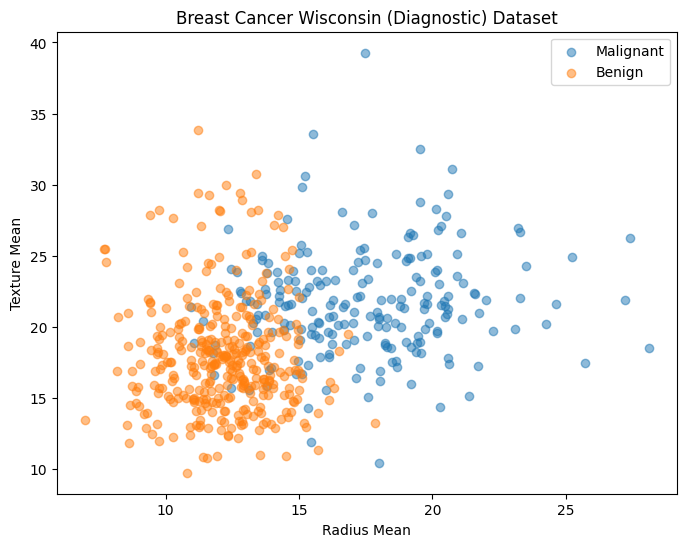

In [11]:
plt.figure(figsize=(8, 6))
plt.title("Breast Cancer Wisconsin (Diagnostic) Dataset")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")

# Use column names directly
plt.scatter(df[df["target"] == 0]["mean radius"],
            df[df["target"] == 0]["mean texture"],
            alpha=0.5, label="Malignant")

plt.scatter(df[df["target"] == 1]["mean radius"],
            df[df["target"] == 1]["mean texture"],
            alpha=0.5, label="Benign")

plt.legend()
plt.show()


### Dataset: Breast Cancer Wisconsin (Diagnostic)
The **Breast Cancer Wisconsin (Diagnostic)** dataset contains measurements from digitized images of breast tissue samples.
After loading the dataset:

- **Number of samples (rows): 569**
Each row represents a single patient’s tumor measurement.

- **Number of features (columns): 30**
These features describe characteristics such as radius, texture, perimeter, area, and various mean/standard error/worst values.

- **Target classes: 2**
The target variable indicates whether the tumor is malignant or benign: <br><br>
                `0` → Malignant <br>
                `1` → Benign

Overall, the dataset shape is:
```
(569 samples, 30 features)
```


## C2 - C3. Decision Tree Classifier Implementation

In [12]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None, gain=0):

        self.feature_index = feature_index  # Index of the feature to split on
        self.threshold = threshold          # Threshold value for the split
        self.left = left                    # Left child node
        self.right = right                  # Right child node
        self.value = value                  # Class label for leaf nodes
        self.gain = gain                    # Information gain from the split

    def is_leaf(self):
        return self.value is not None

In [13]:
def entropy(y):
    _, counts = np.unique(y, return_counts=True) # Get unique classes and their counts
    # example: y = [0, 1, 0, 0, 1] -> unique = [0, 1], counts = [3, 2]

    probabilities = counts / len(y) # Calculate probabilities
    # example: counts = [3, 2] -> probabilities = [3/5, 2/5] = [0.6, 0.4]

    # Calculate entropy using the formula: -sum(p * log2(p))
    # example: entropy = - (0.6 * log2(0.6) + 0.4 * log2(0.4))
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Add a small constant to avoid log(0)

In [14]:
# parent = [0,0,1,1,1]
# left = [0,0]
# right = [1,1,1]
# weighted entropy = (2/5)*entropy(left) + (3/5)*entropy(right)
# information gain = entropy(parent) - weighted entropy
def information_gain(parent, left, right):
    parent_entropy = entropy(parent) # Entropy of the parent node
    w_left = len(left) / len(parent)
    w_right = len(right) / len(parent)
    gain = parent_entropy - (w_left * entropy(left) + w_right * entropy(right))
    return gain


In [15]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2, max_features=None):
        self.max_depth = max_depth # Maximum depth of the tree
        self.min_samples_split = min_samples_split # Minimum samples required to split
        self.max_features = max_features
        self.root = None # root node of the tree
        self.feature_gains = {}  # to accumulate information gain for each feature

    def fit(self, X, y):
        self.root = self.build_tree(X, y) # fit the decision tree to the data

    def build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape # get number of samples and features at current node
        unique_classes, class_counts = np.unique(y, return_counts=True)  # what labels are present and their counts
        majority_class = unique_classes[np.argmax(class_counts)] # most common class in current node

        # Stopping criteria
        # Pure leaf node - only one class present
        # Depth limit reached
        # Not enough samples to split
        if (len(unique_classes) == 1 or
            (self.max_depth is not None and depth >= self.max_depth) or
            num_samples < self.min_samples_split):
            return Node(value=majority_class)

        # Find the best split: tries all features and thresholds to find the best information gain
        best_feature, best_threshold, best_gain = self.best_split(X, y, num_features)

        # Accumulate the gain for feature importance
        if best_feature is not None:
            self.feature_gains[best_feature] = (
                self.feature_gains.get(best_feature, 0) + best_gain
            )


        # If no split is found, return a leaf node with the majority class
        if best_feature is None:
            return Node(value=majority_class)

        # Split the data based on the best feature and threshold
        left_indices = X[:, best_feature] <= best_threshold # samples where feature <= threshold go to left child
        right_indices = X[:, best_feature] > best_threshold # samples where feature > threshold go to right child
        # Example: [1.2, 3.7, 2.5, 0.9]
        # X[:, feature] <= 2.0   ->  [ True, False, False, True ]
        # true indices: [0, 3] -> left child, false indices: [1, 2] -> right child

        # Recursively build the left and right subtrees
        left_child = self.build_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self.build_tree(X[right_indices], y[right_indices], depth + 1)

        # Return a node storing the best feature, threshold, and child nodes
        return Node(feature_index=best_feature, threshold=best_threshold, left=left_child, right=right_child, gain=best_gain)

    def best_split(self, X, y, num_features):
        best_gain = -1
        best_feature, best_threshold = None, None
        if self.max_features is not None:
          # selecting randomly features to split on in this step
          feature_indices = np.random.choice(num_features, size=self.max_features, replace=False)
        else:
          feature_indices = range(num_features)

        for feature_index in feature_indices:

            # For each feature at a node, consider thresholds between sorted distinct feature values
            feature_values = np.unique(X[:, feature_index]) # get sorted unique values of the feature

            if len(feature_values) == 0:
                continue  # Skip if there are no feature values

            # if all samples have the same values then it is not informative split
            if len(feature_values) == 1:
                continue  # Skip if the feature has only one unique value

            # compute potential thresholds as midpoints between consecutive unique feature values
            thresholds = (feature_values[:-1] + feature_values[1:]) / 2

            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold

                # Skip if either side has no samples
                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                # Calculate information gain from this split
                gain = information_gain(y, y[left_indices], y[right_indices])
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def predict(self, X):
        # Predict class labels for all samples in X
        return np.array([self.predict_sample(sample, self.root) for sample in X])

    def predict_sample(self, sample, node):

        # Base case: if leaf node, return the class label
        if node.is_leaf():
            return node.value

        # Recursive case: traverse left or right based on feature and threshold
        if sample[node.feature_index] <= node.threshold:
            return self.predict_sample(sample, node.left)
        else:
            return self.predict_sample(sample, node.right)


## C4 . Hyperparameter Tuning and Analysis

### Hyperparameter Tuning

In [16]:
# explore max_depth ∈ {2, 4, 6, 8, 10}
# explore min_samples_split ∈ {2, 5, 10}
max_depth_values = [2, 4, 6, 8, 10]
min_samples_split_values = [2, 5, 10]

best_val_acc = 0 # track best validation accuracy
best_params = None # track best hyperparameters [max_depth, min_samples_split]
results = [] # store results for analysis (max_depth, min_samples_split, train_acc, val_acc)

# Hyperparameter search
for min_split in min_samples_split_values:
    for max_depth in max_depth_values:

        # Create and train the decision tree
        tree = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_split
        )

        tree.fit(X_train.values, y_train)

        # Validation accuracy
        y_val_pred = tree.predict(X_val.values)
        val_acc = accuracy_score(y_val, y_val_pred)

         # Training accuracy
        y_train_pred = tree.predict(X_train.values)
        train_acc = accuracy_score(y_train, y_train_pred)

        results.append((max_depth, min_split, train_acc, val_acc))

        # Track best params
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_params = (max_depth, min_split)


print("\n==============================")
print(" Hyperparameter Search Results ")
print("==============================\n")

# Convert to DataFrame
df_results = pd.DataFrame(
    results,
    columns=['max_depth', 'min_samples_split', 'train_acc', 'val_acc']
)
print(df_results.to_string(index=False))





 Hyperparameter Search Results 

 max_depth  min_samples_split  train_acc  val_acc
         2                  2   0.952261 0.917647
         4                  2   0.992462 0.988235
         6                  2   0.994975 0.964706
         8                  2   1.000000 0.988235
        10                  2   1.000000 0.988235
         2                  5   0.952261 0.917647
         4                  5   0.992462 0.988235
         6                  5   0.994975 0.964706
         8                  5   0.994975 0.964706
        10                  5   0.994975 0.964706
         2                 10   0.952261 0.917647
         4                 10   0.989950 0.988235
         6                 10   0.992462 0.964706
         8                 10   0.992462 0.964706
        10                 10   0.992462 0.964706


In [22]:
# Display best hyperparameters
print("\nBest hyperparameters for Decision Tree:")
print(f"  - max_depth = {best_params[0]}")
print(f"  - min_samples_split = {best_params[1]}")
print(f"  - Best validation accuracy = {best_val_acc:.4f}")


Best hyperparameters for Decision Tree:
  - max_depth = 4
  - min_samples_split = 2
  - Best validation accuracy = 0.9882


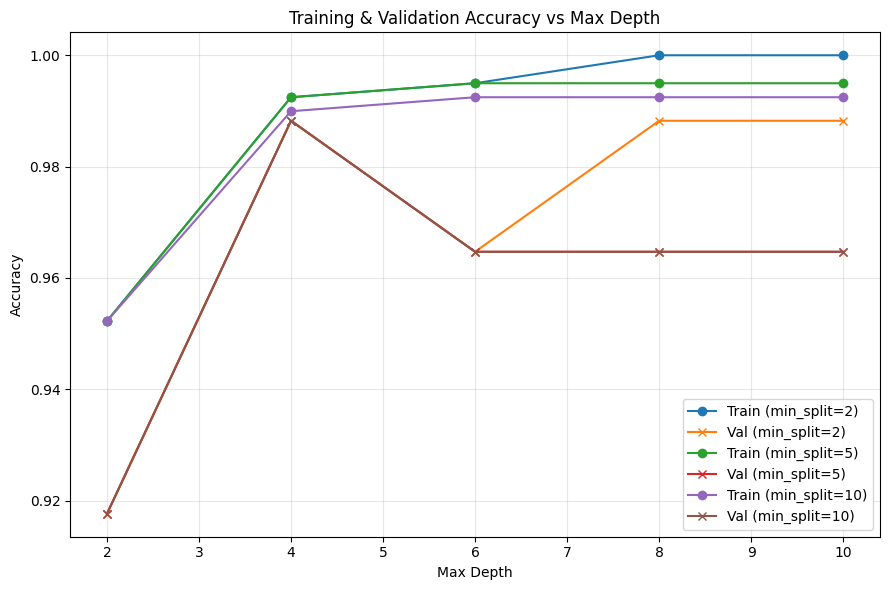

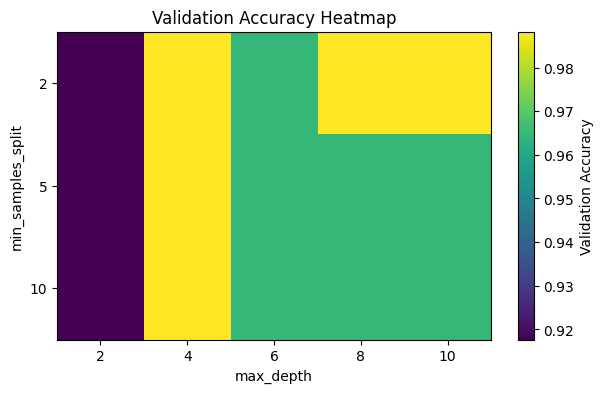

In [23]:
# Plotting
plt.figure(figsize=(9, 6))
for min_split in min_samples_split_values:
    subset = df_results[df_results['min_samples_split'] == min_split]
    plt.plot(subset['max_depth'], subset['train_acc'], marker='o',
                label=f"Train (min_split={min_split})")
    plt.plot(subset['max_depth'], subset['val_acc'], marker='x',
                label=f"Val (min_split={min_split})")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy vs Max Depth")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


pivot = df_results.pivot(
index='min_samples_split',
columns='max_depth',
values='val_acc'
)

plt.figure(figsize=(7, 4))
plt.imshow(pivot, cmap='viridis', aspect='auto')
plt.colorbar(label='Validation Accuracy')
plt.xticks(range(len(max_depth_values)), max_depth_values)
plt.yticks(range(len(min_samples_split_values)), min_samples_split_values)
plt.xlabel("max_depth")
plt.ylabel("min_samples_split")
plt.title("Validation Accuracy Heatmap")
plt.show()


### Tree Complexity: Depth vs. Performance

   max_depth  min_samples_split  train_acc   val_acc
5          2                  5   0.952261  0.917647
6          4                  5   0.992462  0.988235
7          6                  5   0.994975  0.964706
8          8                  5   0.994975  0.964706
9         10                  5   0.994975  0.964706


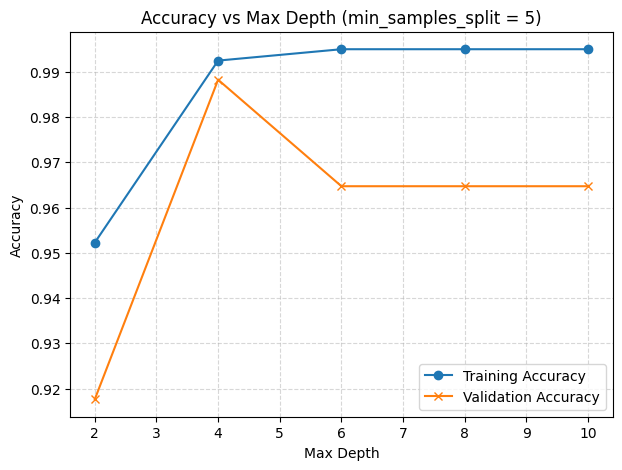

In [24]:
# Training & Validation Accuracy vs Max Depth for fixed min_samples_split
fixed_min_samples_split = 5
subset = df_results[df_results['min_samples_split'] == fixed_min_samples_split]
print(subset)

plt.figure(figsize=(7,5))
plt.plot(subset['max_depth'], subset['train_acc'], marker='o', label="Training Accuracy")
plt.plot(subset['max_depth'], subset['val_acc'], marker='x', label="Validation Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs Max Depth (min_samples_split = {fixed_min_samples_split})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


**Training accuracy** approaches 1 as max depth increases, indicating the model fits training data well.

**Validation accuracy** peaks around max depth of 4, suggesting optimal complexity before overfitting occurs.
    
- Depth = 2
        Underfitting (low val_acc)
    
- Depth = 4
        Optimal fit (high val_acc + low complexity)
    
- Depth = 6 - 10
        Clear overfitting
            Train: 0.994975 (very high)
            Val: 0.964706 (drops)


**Overfitting** happens when:
- **Training accuracy** keeps increasing
- **Validation accuracy** does not improve, or decreases

### Overfitting Analysis
As the tree depth increases, the decision tree becomes more expressive and achieves higher training accuracy. However, beyond a certain depth, the model begins to overfit, fitting noise rather than meaningful patterns.

This is reflected in the widening gap between training and validation accuracy: training accuracy approaches 100%, while validation accuracy stops improving or decreases.

Therefore, controlling tree complexity (i.e., limiting max depth) is essential to maintain good generalization performance.

### Evaluate on Test Set

In [25]:
# Evaluate model on test set
# Retrain on train + val sets with best hyperparameters
best_tree = DecisionTreeClassifier(
    max_depth=best_params[0],
    min_samples_split=best_params[1]
)
best_tree.fit(
    X=np.vstack([X_train, X_val]),
    y=np.hstack([y_train, y_val])
)

# Test accuracy
y_test_pred = best_tree.predict(X_test.values)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\nFinal Test Accuracy = {test_acc:.4f}")




Final Test Accuracy = 0.8837


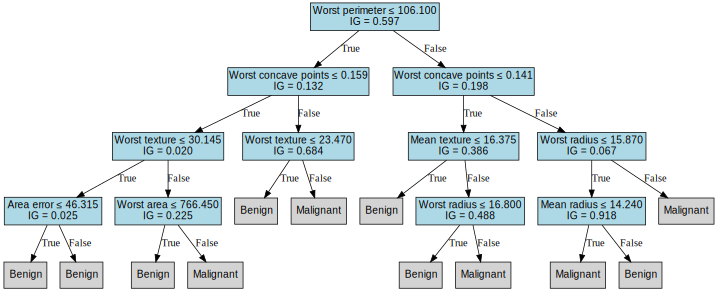

In [26]:
from graphviz import Digraph, Source

def visualize_tree(node, feature_names, dot=None, node_id=0, parent_gain=None):
    """
    Recursively visualize the decision tree with Graphviz
    """
    if dot is None:
        dot = Digraph(format='png')
        dot.attr('node', shape='box', style='filled', fontname='Helvetica')

    current_id = str(node_id)

    if node.is_leaf():
        # Leaf node
        # Malignant or Benign
        label = f"{'Malignant' if node.value == 0 else 'Benign'}"
        dot.node(current_id, label, fillcolor="lightgrey")
    else:
        # Internal node
        feature_name = feature_names[node.feature_index].capitalize()
        gain_text = f"IG = {node.gain:.3f}" if node.gain is not None else ""
        # Optional: color nodes based on gain
        fill_color = f"{min(1.0, node.gain*2):.2f}" if node.gain is not None else "0.5"
        dot.node(current_id,
                f"{feature_name} ≤ {node.threshold:.3f}\n{gain_text}",
                fillcolor=f"lightblue")

        # Recursive calls
        left_id = str(node_id*2 + 1)
        right_id = str(node_id*2 + 2)

        dot.edge(current_id, left_id, label="True")
        dot.edge(current_id, right_id, label="False")

        visualize_tree(node.left, feature_names, dot, node_id*2 + 1)
        visualize_tree(node.right, feature_names, dot, node_id*2 + 2)

    return dot

# Visualize the best decision tree
dot = visualize_tree(best_tree.root, feature_names=data.feature_names)

# Set the size for display
dot.attr(size="10,8!")   # width=12, height=8 inches
dot.attr(ratio="auto")   # maintain aspect ratio
dot.render("decision_tree", format="png", cleanup=True)  # saves as PNG
Source(dot.source)

# dot.view()  # opens the visualization


---

## C5. Analysis and Evaluation

### Performance Metrics: Accuracy, Precision, Recall, F1-score for both classes

In [27]:
from sklearn.metrics import classification_report

y_test_pred = best_tree.predict(X_test.values)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        32
           1       0.89      0.93      0.91        54

    accuracy                           0.88        86
   macro avg       0.88      0.87      0.87        86
weighted avg       0.88      0.88      0.88        86



1. **Accuracy**: Overall correctness of the model.
    $$\frac{TP + TN}{TP + TN + FP + FN}$$
    - 88% of all 86 samples were correctly classified.
2. **Precision**: Correct positive predictions out of all positive predictions.
    $$\frac{TP}{TP + FP}$$
    - Precision for Malignant class: 87% of samples predicted as Malignant are actually Malignant.
    - Precision for Benign class: 89% of samples predicted as Benign are actually Benign.
3. **Recall**: Correct positive predictions out of all actual positives.
    $$\frac{TP}{TP + FN}$$
    - Recall for Malignant class: 81% of actual Malignant samples were correctly identified.
    - Recall for Benign class: 93% of actual Benign samples were correctly identified and 7% were misclassified as Malignant.
4. **F1-score**: Harmonic mean of precision and recall.
    $$2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
    - F1-score for Malignant class: 84% of samples predicted as Malignant are actually Malignant (balances precision (0.87) and recall (0.81)).
    - F1-score for Benign class: 91% of samples predicted as Benign are actually Benign (balances precision (0.89) and recall (0.93)).

The model performs reasonably well overall, achieving **88% accuracy** on the validation set and **F1-scores ~0.84–0.91**.

**Class 0 (Malignant):** Recall is 0.81, meaning the model correctly identifies 81% of actual samples of this class. Precision is slightly higher (0.87), indicating some samples from class 1 are misclassified as class 0.

**Class 1 (Benign):** Precision is 0.89, so most predicted class-1 samples are correct. Recall is slightly higher (0.93), meaning a small number of actual class-1 samples are misclassified as class 0.
The model never misses class-0 examples (perfect recall), but it incorrectly labels a few class-1 samples as class-0 (lower precision).

Slight imbalance in performance between classes: better at detecting class 1 than class 0.

### Confusion Matrix (Test Set)

<Figure size 600x500 with 0 Axes>

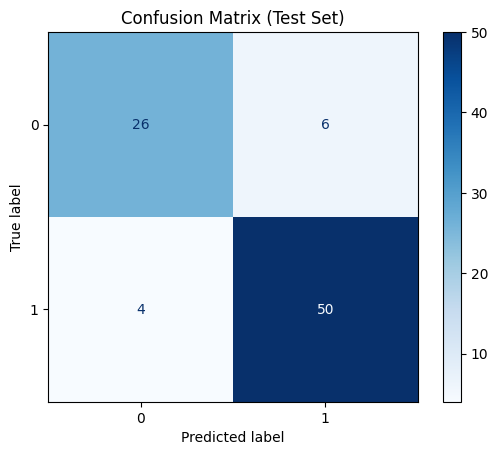

In [28]:
# Test set predictions
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()

- **True Negative (TN): 26**
    -> Model correctly predicted class Malignant.

- **False Positive (FP): 6**
    -> Model predicted Benign, but the true label was Malignant.

- **False Negative (FN): 4**
    -> Model predicted Malignant, but the true label was Benign.

- **True Positive (TP): 50**
    -> Model correctly predicted class Benign.

### Feature Importance

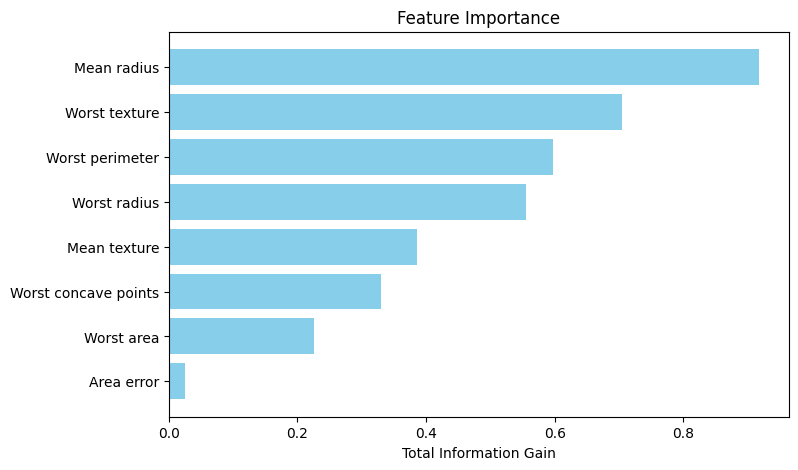

In [29]:
# Best tree feature importance plot

sorted_importance = sorted(best_tree.feature_gains.items(), key=lambda x: x[1], reverse=True)

features = [df.columns[feat].capitalize() for feat, gain in sorted_importance]
gains = [gain for feat, gain in sorted_importance]

plt.figure(figsize=(8, 5))
plt.barh(features[::-1], gains[::-1], color='skyblue')
plt.xlabel("Total Information Gain")
plt.title("Feature Importance")
plt.show()

# Part D Random Forest

## Random Forest Implementation

In [30]:
# Bootstrapping is randomly sampling from the dataset with replacement to create a new dataset of the same size.
def bootstrap_dataset(x,y):
  n_samples = x.shape[0] # number of samples in the dataset
  indices = np.random.choice(n_samples,size=n_samples,replace=True)
  # range of the samples to randomly choose from, HM samples to choose, with replacement (allowing duplicates)
  x_sample = x[indices]        #select only the samples at these indices that were randomly generated
  y_sample = y[indices]
  return x_sample,y_sample

In [31]:
def train_random_forest(x, y, T=10, max_depth=4, min_samples_split=2, max_features=None):
  # Train a Random Forest of T decision trees.
  # Returns a list of trained trees.
  forest = []

  for t in range(T):
    #step 1: for each tree we will have a bootstrap dataset
    x_sample, y_sample = bootstrap_dataset(x,y)


    #step 2: train a tree on this sample

    tree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features
    )

    tree.fit(x_sample,y_sample)

    forest.append(tree)

  return forest

In [32]:
def predict_random_forest(forest,x):

  predictions = []

  # get predictions from each tree and append to predictions list
  for tree in forest:
    predictions.append(tree.predict(x))

  # convert list of predictions to a numpy array for easier manipulation
  predictions = np.array(predictions)

  #shape:
  # (T, n_samples)
  # Each row = predictions from one tree
  # Each column = predictions for a single sample across trees
  # what happened here was traversing the tree
  # to classify it (this repeats over all T and then
  # we take the majority as the prediction)

  # majority votings
  n_samples = predictions.shape[1]  # number of samples
  majority_vote = []
  # get all predictions from all trees for sample i
  for i in range(n_samples):

    vote = predictions[:,i] # all rows (all trees, but the column of the ith sample)

    # counts how many times each value appears in an array. [3,2] the class at indexe 0-> appeared 3 times and class at index1 appeared twice
    majority = np.bincount(vote).argmax() # argmax to return which class malignent or benign not the actual count of votes for each class

    majority_vote.append(majority)
  return np.array(majority_vote)
  #returns array of predictions for all the set

## Hyperparameter Tuning and Evaluation

In [33]:
max_depth = best_params[0]
min_samples_split = best_params[1]
d = X_train.shape[1]
max_features_options = [int(np.sqrt(d)), int(d/2)]
print(f"Number of features d = {d}, max_features options: {max_features_options}")

T_values = [5, 10, 30, 50]
best_val_acc = 0
best_params_rf = None
best_forest = None

# store results
results = []

for t in T_values:
    for max_feat in max_features_options:
        forest = train_random_forest(
            X_train.values,
            y_train.values,
            T=t,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            max_features=max_feat
        )

        # Train accuracy
        y_train_pred = predict_random_forest(forest, X_train.values)
        train_acc = accuracy_score(y_train, y_train_pred)

        # Validation accuracy
        y_val_pred = predict_random_forest(forest, X_val.values)
        val_acc = accuracy_score(y_val, y_val_pred)

        # store results
        results.append([t, max_feat,train_acc, val_acc])

        # update best
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_params_rf = (t, max_feat)
            best_forest = forest

# convert results to DataFrame
print("\n==============================")
print(" Hyperparameter Search Results ")
print("==============================\n")
df_results = pd.DataFrame(
    results,
    columns=["T", "max_features", "Train Accuracy", "Val Accuracy"]
)
print(df_results.to_string(index=False))

print(f"Best params: T={best_params_rf[0]}, max_features={best_params_rf[1]}, Val Accuracy={best_val_acc:.4f}")


Number of features d = 30, max_features options: [5, 15]

 Hyperparameter Search Results 

 T  max_features  Train Accuracy  Val Accuracy
 5             5        0.987437      0.976471
 5            15        0.989950      0.988235
10             5        0.989950      1.000000
10            15        0.987437      0.976471
30             5        0.987437      0.964706
30            15        0.989950      0.988235
50             5        0.992462      0.988235
50            15        0.992462      0.988235
Best params: T=10, max_features=5, Val Accuracy=1.0000


In [37]:
print(f"\nBest hyperparameters for Random Forest:")
print(f"  - T = {best_params_rf[0]}")
print(f"  - max_features = {best_params_rf[1]}")


Best hyperparameters for Random Forest:
  - T = 10
  - max_features = 5


## Evaluate on Test Set

In [35]:
# Retrain on train + val
best_T, best_max_features = best_params_rf

best_forest = train_random_forest(
    x=np.vstack([X_train, X_val]),
    y=np.hstack([y_train, y_val]),
    T=best_T,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    max_features=best_max_features
)
# Test accuracy
y_test_pred_rf = predict_random_forest(best_forest, X_test.values)
test_acc_rf = accuracy_score(y_test.values, y_test_pred_rf)
print(f"Test Accuracy: {test_acc_rf:.4f}")



Test Accuracy: 0.9070


In [36]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.90      0.96      0.93        54

    accuracy                           0.91        86
   macro avg       0.91      0.89      0.90        86
weighted avg       0.91      0.91      0.91        86



### Comparison: Single Decision Tree vs Random Forest

- **Decision Tree**
  - Simple and easy to interpret.
  - High training accuracy (~98%) but lower validation accuracy (~88%).
  - Prone to **high variance**: small changes in training data can drastically affect predictions.
  - Tends to **overfit**, especially with deep trees.
  - Class-specific metrics show some imbalance:
    - Class 0 recall: 0.81
    - Class 1 recall: 0.93
  - Sensitive and unstable predictions.

- **Random Forest**
  - Ensemble of multiple decision trees trained on bootstrap samples with random subsets of features.
  - Reduces **variance** significantly while slightly increasing bias.
  - More robust and stable predictions.
  - Higher validation accuracy (~91%) and improved F1-scores.
  - Class-specific metrics show improvement:
    - Class 0 recall: 0.81
    - Class 1 recall: 0.96
  - Less prone to overfitting compared to a single tree.

- **Conclusion**
  - Random Forest improves generalization by averaging multiple trees.
  - Single trees may overfit and be unstable, while ensembles balance bias and variance effectively.
  - Ensemble methods like Random Forest are preferred for more reliable predictions.
